In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import yahist

from utils.analysis import Optimization

In [2]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies = [baby for baby in babies if "data" not in baby]
babies

['../analysis/studies/onelep/output/Run2/SingleTop.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/VH.root',
 '../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/VBSWH_mkW.root']

In [3]:
vbswh = Optimization(
    sig_root_files=babies[-1:],
    bkg_root_files=babies[:-1],
    ttree_name="tree",
    weight_columns=["xsec_sf"]
)

In [4]:
vbswh.sig_count(selection="M_jj > 500 and abs(deta_jj) > 3 and ST < 1000")

418.13189513236284

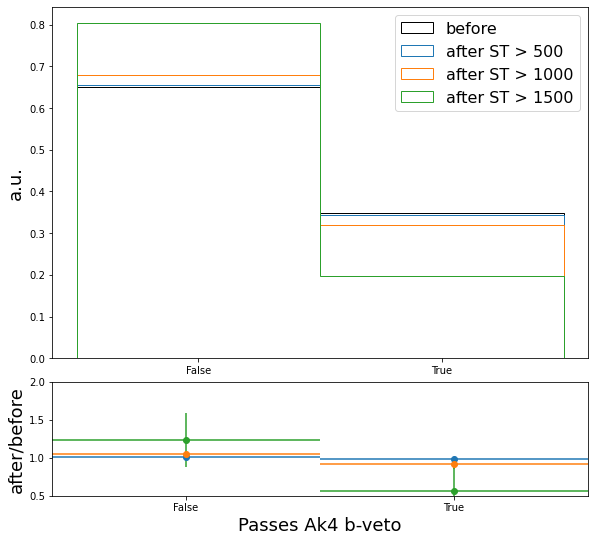

In [5]:
is_ttbar_sample = "(name == 'TTbar1L' | name == 'TTbar2L' | name == 'TTX')"

hist_axes, ratio_axes = vbswh.plot_correlation(
    "passes_bveto", 
    np.linspace(0, 2, 3), 
    base_selection=f"M_jj > 1500 and abs(deta_jj) > 4 and {is_ttbar_sample}", 
    selections=[
        "ST > 500",
        "ST > 1000",
        "ST > 1500",
    ], 
    x_label="Passes Ak4 b-veto"
);

hist_axes.set_xticks([0.5, 1.5]);
hist_axes.set_xticklabels(["False", "True"]);
ratio_axes.set_xticks([0.5, 1.5]);
ratio_axes.set_xticklabels(["False", "True"]);

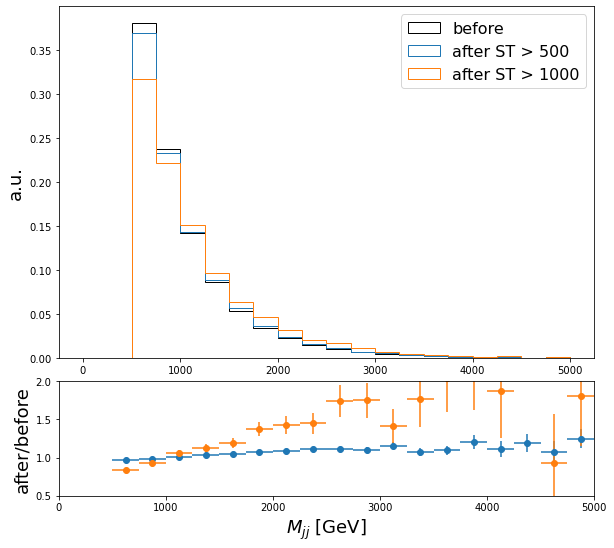

In [6]:
vbswh.plot_correlation(
    "M_jj", 
    np.linspace(0, 5000, 21),  
    selections=[
        "ST > 500",
        "ST > 1000",
    ], 
    x_label=r"$M_{jj}$ [GeV]"
);

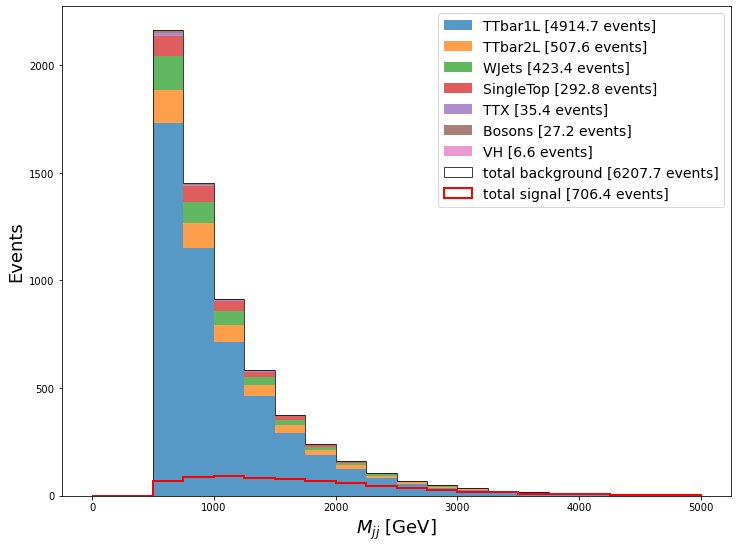

In [7]:
vbswh.plot_sig_vs_bkg(
    "M_jj", np.linspace(0, 5000, 21), 
    selection="passes_bveto", 
    x_label="$M_{jj}$ [GeV]",
    stacked=True
);

In [8]:
vbswh.fom_scan("M_jj", [1000, 1500, 2000, 2500], operator=">", base_selection="passes_bveto")

sel,sig,bkg,fom
passes_bveto,706.3757318481803,6207.661748262202,8.96544288174474
passes_bveto and M_jj > 1000,551.3172892853618,2590.720277329768,10.83156848532143
passes_bveto and M_jj > 1500,375.25336518883705,1095.7474581032593,11.336248557948958
passes_bveto and M_jj > 2000,229.02518039941788,480.59973812266765,10.446996975878102
passes_bveto and M_jj > 2500,127.68839940428734,213.19447241775526,8.74507367930024


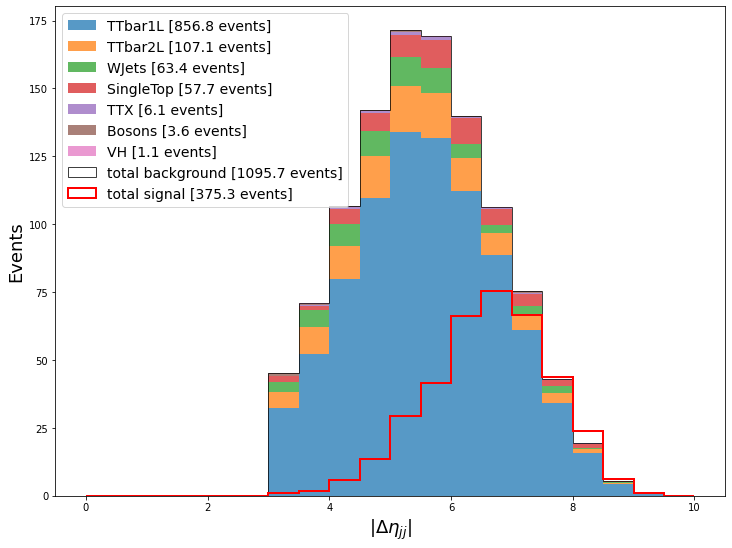

In [9]:
axes = vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 10, 21), 
    selection="passes_bveto and M_jj > 1500", 
    x_label="$|\Delta\eta_{jj}|$",
    transf=abs,
    stacked=True
);
axes.legend(loc=2, fontsize=14);

In [10]:
vbswh.fom_scan(
    "deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", 
    base_selection="M_jj > 1500", abs=True
)

sel,sig,bkg,fom
M_jj > 1500,388.76288920640945,2969.1903931904867,7.1345367227563425
M_jj > 1500 and abs(deta_jj) > 3.5,387.6659681722522,2854.93364962656,7.255371718300077
M_jj > 1500 and abs(deta_jj) > 4,385.55664855241776,2670.6470173798566,7.4607064277468815
M_jj > 1500 and abs(deta_jj) > 4.5,379.438509196043,2400.3520372353646,7.744688152723292
M_jj > 1500 and abs(deta_jj) > 5,365.17398931086063,2034.4744289990556,8.096060001034148
M_jj > 1500 and abs(deta_jj) > 5.5,334.18675976246595,1587.2014768800943,8.38828562564203
M_jj > 1500 and abs(deta_jj) > 6,290.41970294713974,1135.7394355330302,8.61760778347917
M_jj > 1500 and abs(deta_jj) > 6.5,221.9326846897602,743.1379346589106,8.141164894791658
M_jj > 1500 and abs(deta_jj) > 7,144.33733638375998,440.51147254038204,6.877016633242749


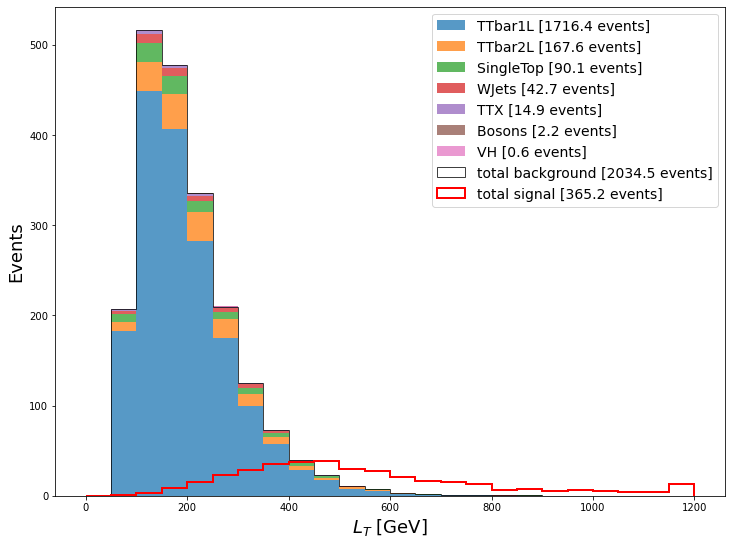

In [11]:
vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1200, 25), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", 
    x_label="$L_T$ [GeV]",
    stacked=True
);

In [12]:
vbswh.fom_scan(
    "LT", [500, 600, 700, 800, 900, 1000, 1100, 1200], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
);

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5,365.17398931086063,2034.4744289990556,8.096060001034148
M_jj > 1500 and abs(deta_jj) > 5 and LT > 500,174.16706231236458,26.795136699057593,33.646356185940824
M_jj > 1500 and abs(deta_jj) > 5 and LT > 600,117.04804612696171,8.22031607625945,40.82440935188196
M_jj > 1500 and abs(deta_jj) > 5 and LT > 700,80.39838106185198,2.8808208904374624,47.36845010415217
M_jj > 1500 and abs(deta_jj) > 5 and LT > 800,52.361389219760895,1.126747294285451,49.328498758232776
M_jj > 1500 and abs(deta_jj) > 5 and LT > 900,38.11539797484875,0.2952315679140156,70.14860876799675
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1000,26.548436157405376,0.13146391122427303,73.2210022907541
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1100,17.355193369090557,0.122063686416368,49.67481014843177
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1200,11.244536116719246,0.07891340150672477,40.028209288536985


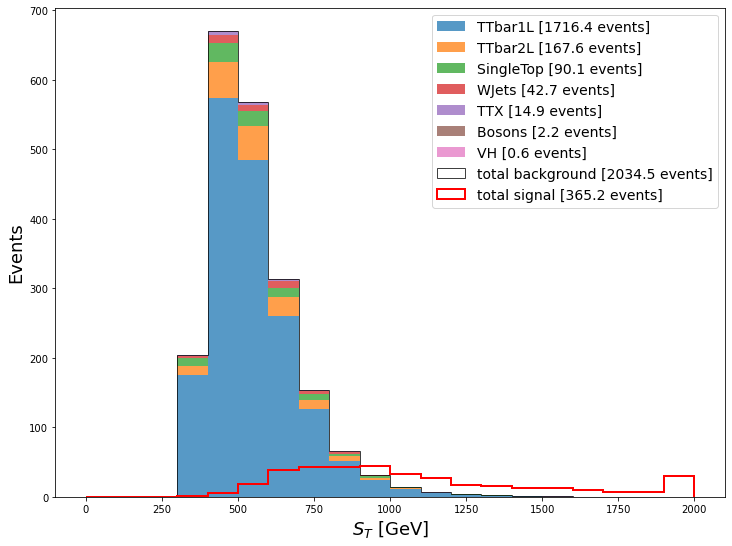

In [13]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(0, 2000, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", x_label="$S_T$ [GeV]",
    stacked=True
);
axes.set_ylim(ymin=0);

In [14]:
vbswh.fom_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1650, 1700, 1800], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5,365.17398931086063,2034.4744289990556,8.096060001034148
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1000,171.77354730665684,28.358610436750723,32.25624514308525
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1100,138.30507846921682,13.752160385519574,37.295176178439405
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1200,111.29633686691523,7.500422030250775,40.638532816540064
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,93.74830712378025,3.8634577450684446,47.69527429742317
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1400,77.87547919899225,1.7508244589153037,58.85446680410031
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1500,65.80745171755552,0.9942898601148045,65.99614507970495
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1600,53.1415763348341,0.5528750960802427,71.46952879802994
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1650,48.6583352163434,0.500808303579106,68.75772291537798
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1700,43.68288365751505,0.39189565698

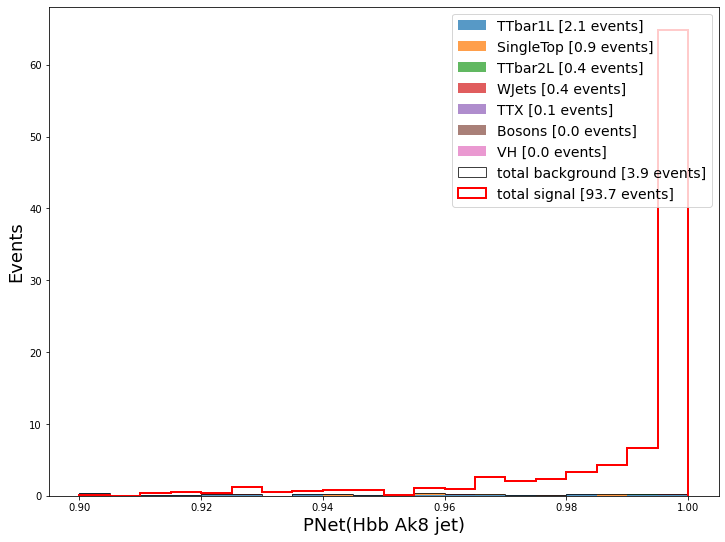

In [15]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0.9, 1.0, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300", 
    x_label="PNet(Hbb Ak8 jet)",
    stacked=True
);

In [16]:
vbswh.fom_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,93.74830712378025,3.8634577450684446,47.69527429742317
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.91,93.67551909387112,3.4391963253983704,50.51235587884351
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.92,92.7359085381031,3.1460208915486874,52.283798229704566
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.93,91.07786436378956,2.7072485942444473,55.353969496435006
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,89.85261895507574,2.4481060732323385,57.42693325495941
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.95,88.31031672656536,2.146273297355947,60.279401434963184
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.96,87.12335597723722,1.6091734879992146,68.68045468553701
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.97,83.5043810904026,1.1659643028142455,77.3

(sig, bkg)
(65.80745171755552, 0.9942898601148045)
(426, 79)
(32.43043436855078, 1.9166934318345739)
(215, 144)


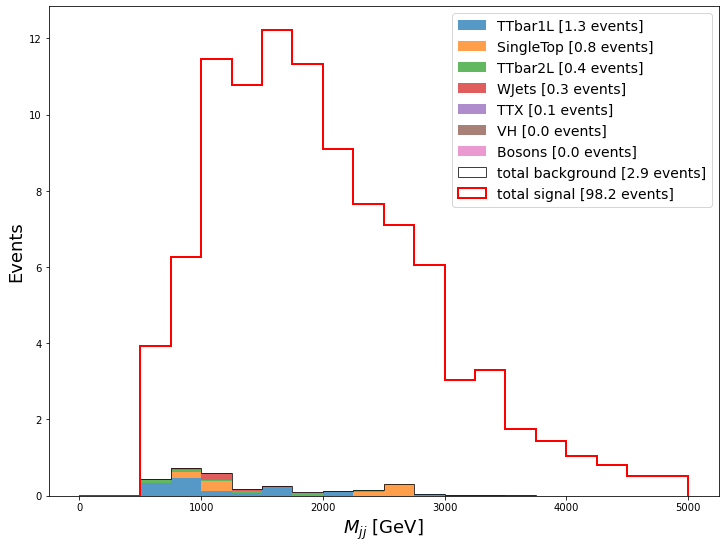

In [17]:
vbswh.plot_sig_vs_bkg(
    "M_jj", np.linspace(0, 5000, 21), 
    selection="abs(deta_jj) > 5 and ST > 1500",
    x_label="$M_{jj}$ [GeV]", 
    logy=True,
    stacked=True
);
print("(sig, bkg)")
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj >= 1500"))
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj >= 1500", raw=True))
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj < 1500"))
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj < 1500", raw=True))

In [18]:
def lepton_charge_plot(vbswh, selection=None):
    fig, axes = plt.subplots(figsize=(12, 9))

    bkg_df = vbswh.bkg_df(selection=selection)
    sig_df = vbswh.sig_df(selection=selection)

    bkg_counts, _, _ = axes.hist(
        (bkg_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        alpha=0.5,
        weights=np.ones(len(bkg_df))/len(bkg_df),
        label=f"total background [{bkg_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, bkg_counts[0]+0.01, f"{bkg_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, bkg_counts[1]+0.01, f"{bkg_counts[1]:0.2f}", size=16, ha="center")

    sig_counts, _, _ = axes.hist(
        (sig_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        histtype="step",
        color="r",
        weights=np.ones(len(sig_df))/len(sig_df),
        label=f"total signal [{sig_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, sig_counts[0]+0.01, f"{sig_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, sig_counts[1]+0.01, f"{sig_counts[1]:0.2f}", size=16, ha="center")

    axes.set_ylabel("Events/Total", size=18)
    axes.set_xticks([0.5, 1.5]);
    axes.set_xticklabels(["$\ell^{+}$", "$\ell^{-}$"], size=18);

    axes.legend(fontsize=16);

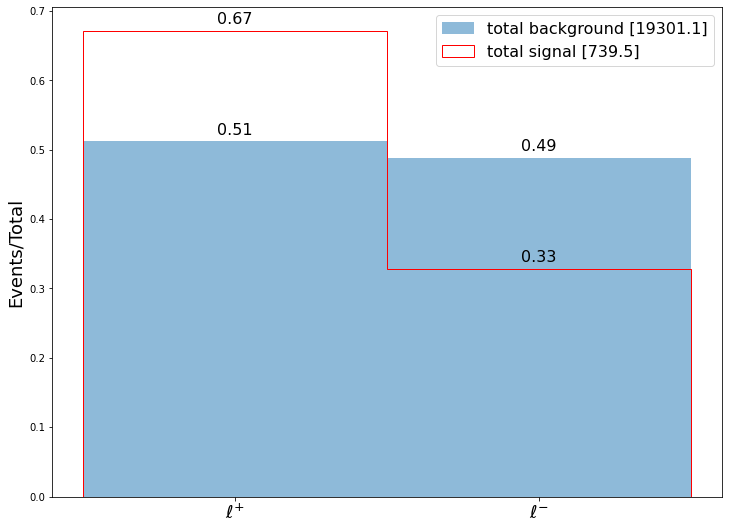

In [19]:
lepton_charge_plot(vbswh)

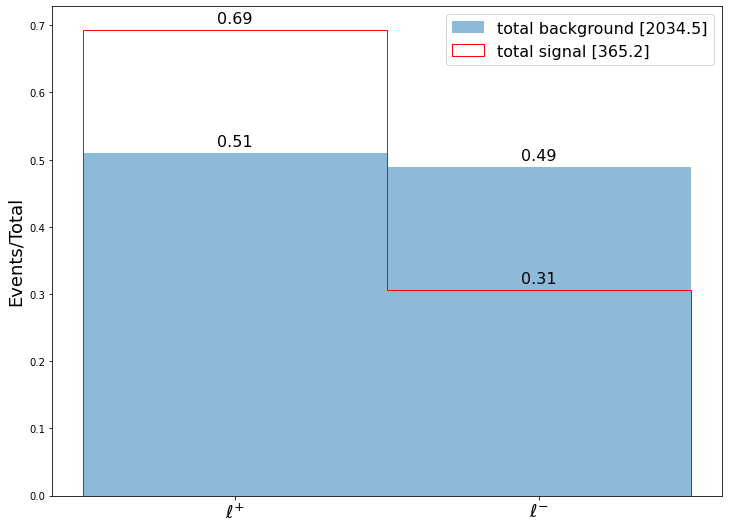

In [20]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5")

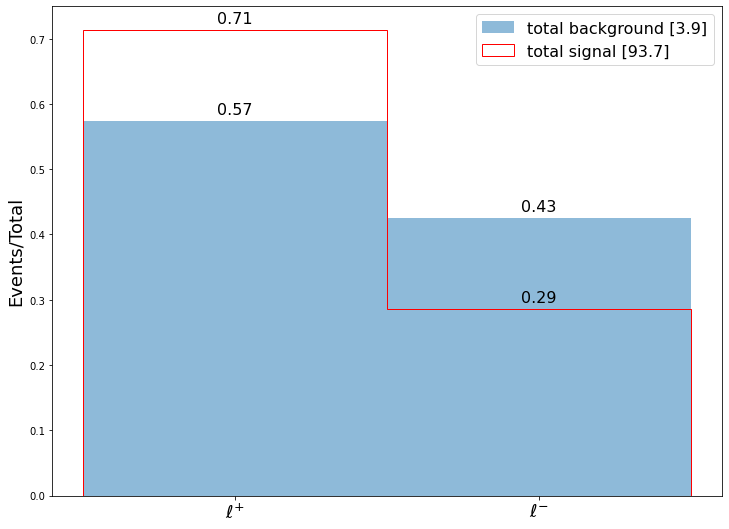

In [21]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300")